### Yusif Hajizade CS-020 id: 22022735
# Gradients

Understanding gradients will allow us to eventually understand edge detection which we will use later on, since its an important aspect of object detection in general.
Make sure to watch the lecture video for the full overview!

In [1]:
# import cv2, numpy and matplotlib
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read sudoku image
image_path = r".\Data\sudoku.jpg"  # Using a raw string

img = cv2.imread(image_path)

In [3]:
# Create display_img function
def display_img(img):
    plt.imshow(img, cmap="gray")
    plt.show()

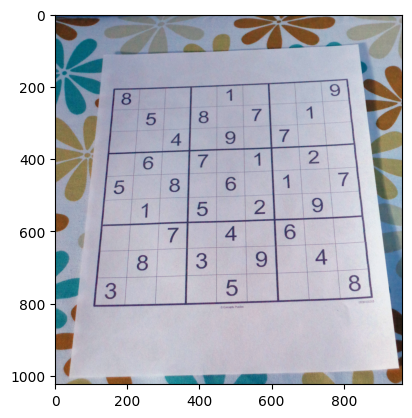

In [5]:
# call display_img function to display the img
display_img(img)

In [6]:
# Use Sobel function for x-axis gradient
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)

# Use Sobel function for y-axis gradient
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)

# Use Laplacian function to apply the Laplacian operation on the img
laplacian = cv2.Laplacian(img, cv2.CV_64F)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


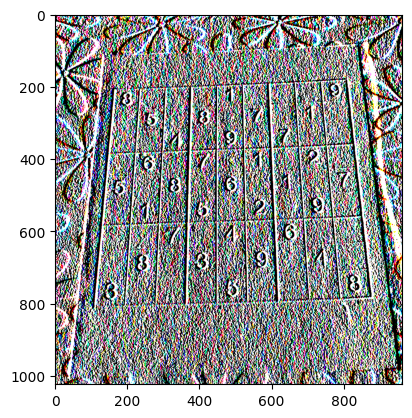

In [7]:
# display_img sobelx
display_img(sobelx)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


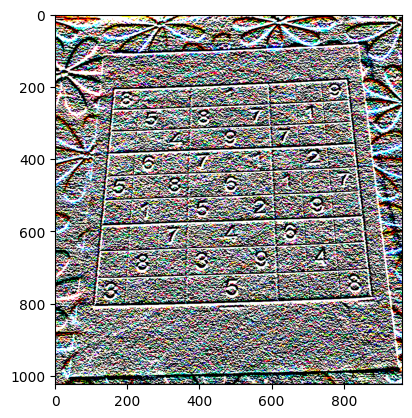

In [8]:
# display_img sobely
display_img(sobely)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


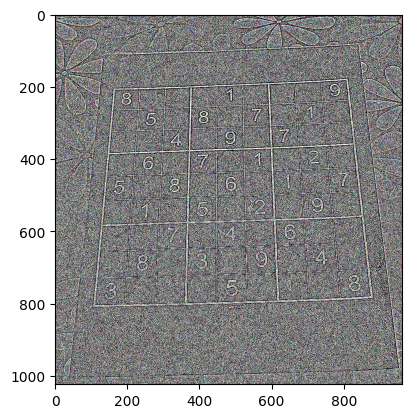

In [9]:
# display_img laplacian
display_img(laplacian)

## Combining Previous Ideas

Let's play around with these images with some of the other ideas we've already seen!

### Blending Images

In [10]:
# use addweighted function to blend sobelx and sobely with alpha=0.5, beta=0.5, gamma=0
blended = cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


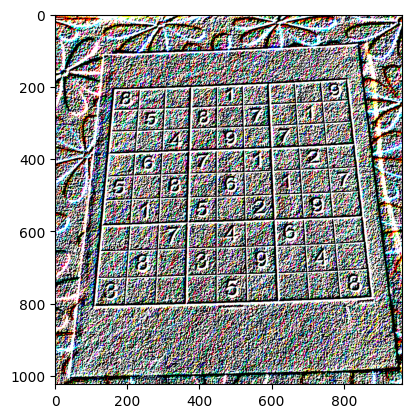

In [11]:
# display_img blended
display_img(blended)

In [12]:
# show the shape of the blended image
print("Shape of blended image:", blended.shape)

Shape of blended image: (1024, 962, 3)


### Morphological Operators

In [13]:
# create 4x4 ones kernel
kernel = np.ones((4, 4), np.uint8)
# apply morphologyEx function with morph_gradient parameter and the kernel
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

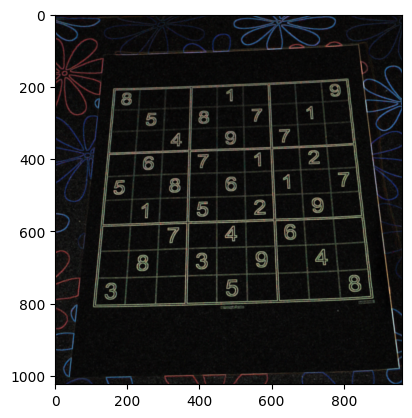

In [14]:
# display_img gradient
display_img(gradient)

Try it on the laplacian result!

In [15]:
# create 3x3 ones kernel
kernel = np.ones((3, 3), np.uint8)
# apply morphologyEx function with morph_gradient parameter and the kernel to create the gradient of the original img
gradient = cv2.morphologyEx(laplacian, cv2.MORPH_GRADIENT, kernel)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


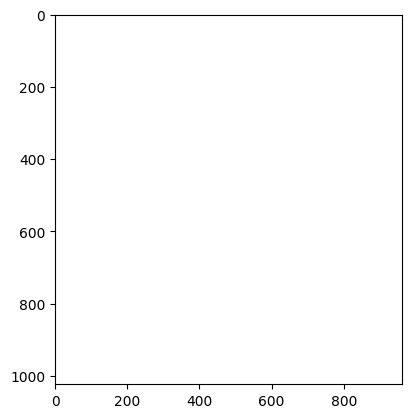

In [16]:
# display_img (gradient)
display_img (gradient)

### Thresholds

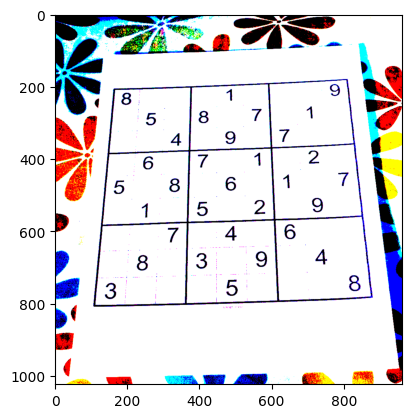

In [17]:
# Apply threashold function with THRESH_BINARY param on the original image and display the returned image
ret, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
# Display the thresholded image
display_img(thresh1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


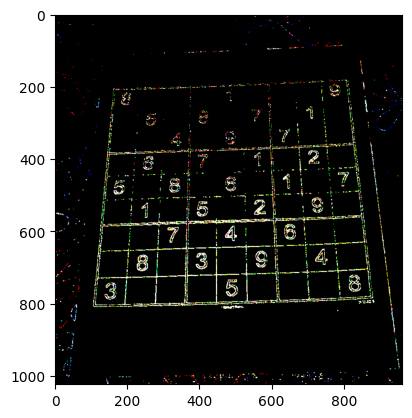

In [18]:
# Apply threshold function with THRESH_BINARY parameter on the gradient image
ret, thresh2 = cv2.threshold(gradient, 127, 255, cv2.THRESH_BINARY)
# Display the thresholded gradient image
display_img(thresh2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


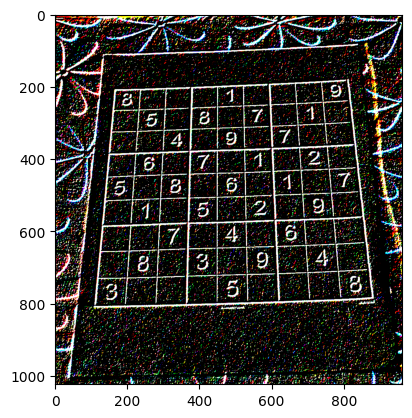

In [19]:
# Apply threashold function with THRESH_BINARY param on the blended image and display the returned image

# Apply threshold function with THRESH_BINARY parameter on the blended image
ret, thresh3 = cv2.threshold(blended, 127, 255, cv2.THRESH_BINARY)
# Display the thresholded blended image
display_img(thresh3)